In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#path1= 'horseColicTraining.txt '
#path2 = 'horseColicTest.txt'
#data1=np.loadtxt(path1)
#data2=np.loadtxt(path2)
##提取数据和标签
#train_data  = data1[:, :-1]
#train_label = data1[:, -1]
#test_data = data2[: , :-1]
#test_label = data1[:, -1]
# 添加偏置项到训练数据中（在特征前添加一列全为1的列）
#train_data = np.c_[np.ones((train_data.shape[0], 1)), train_data]
#test_data = np.c_[np.ones((test_data.shape[0], 1)), test_data]

In [24]:
# 读取训练数据
with open('horseColicTraining.txt', 'r') as file:
    content = file.readlines()

train_array = np.array([line.strip().split() for line in content], dtype=float)
train_data = train_array[:, :-1]
train_label = train_array[:, -1]

# 在矩阵右侧添加一列全为1的列
train_data = np.hstack((train_data, np.ones((train_data.shape[0], 1))))

# 读取测试数据
with open('horseColicTest.txt', 'r') as file:
    content = file.readlines()

test_array = np.array([line.strip().split() for line in content], dtype=float)
test_data = test_array[:, :-1]
test_label = test_array[:, -1]

# 在测试数据中添加一列全为1的列
test_data = np.hstack((test_data, np.ones((test_data.shape[0], 1))))

In [25]:
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [26]:
# 定义 sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [27]:
# 计算准确率
def calculate_accuracy(predictions, baseline_labels):
    correct_predictions = np.sum(predictions == baseline_labels)
    total_predictions = len(baseline_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [28]:
#梯度下降
weights = np.zeros(train_data.shape[1])
# 利用梯度下降进行求解
rate = 0.01  # 学习率
num_iterations = 100000  # 迭代次数
total = len(train_data) ** 2
for i in range(num_iterations):
    predictions = sigmoid(np.matmul(train_data,weights))
    gradient = np.matmul(train_data.T, (predictions - train_label)) / total
    weights -= rate * gradient
    #predictions = sigmoid(np.matmul(train_data, weights))
    #error = predictions - train_label
    #gradient = np.matmul(train_data.T , error)/total
    #weights += gradient * rate
    #w_gradient = np.dot(predictions ,(1 - predictions))
    # 计算梯度并更新权重
    #gradient = 2*np.dot(train_data.T, np.dot( error ,w_gradient)) / len(train_data)
    #weights += rate * gradient

In [29]:
# 在测试集上进行预测
predictions = sigmoid(np.matmul(test_data, weights))

# 将概率值转换为二分类标签（大于等于0.5的为1，小于0.5的为0）
predicted_labels = (predictions > 0.5).astype(int)

# 统计总体正确分类的点的个数
correct_total = np.sum(predicted_labels == test_label)

# 计算总体准确率
total_samples = len(test_label)
accuracy_total = correct_total / total_samples

print(f'Total Accuracy: {accuracy_total * 100}%')

# 统计正确分类的0和1的点
correct_label0 = np.sum((predicted_labels == 0) & (test_label == 0))
correct_label1 = np.sum((predicted_labels == 1) & (test_label == 1))
# 统计错误分类的点
misclassified_points = np.where(predicted_labels != test_label)[0]


print(f'Correctly classified Label 0: {correct_label0} points')
print(f'Correctly classified Label 1: {correct_label1} points')
print(f'Misclassified points: {len(misclassified_points)} points')

Total Accuracy: 77.61194029850746%
Correctly classified Label 0: 13 points
Correctly classified Label 1: 39 points
Misclassified points: 15 points


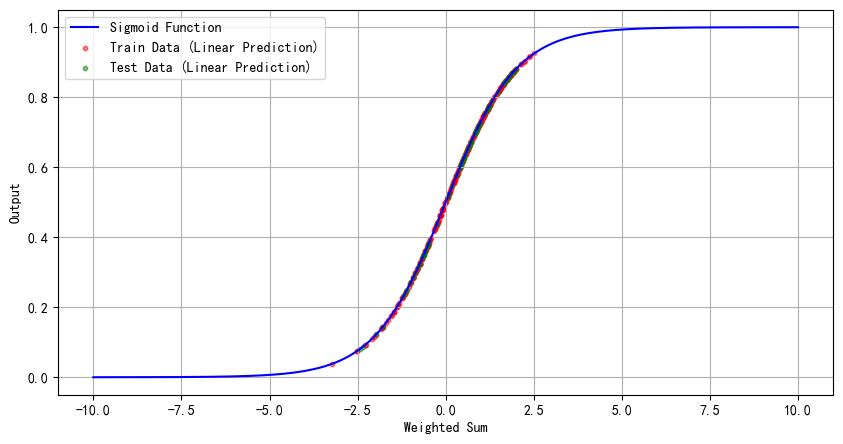

In [30]:
# 画出sigmoid函数的曲线
x = np.linspace(-10, 10, 1000)
sigmoid_curve = 1 / (1 + np.exp(-x))
# 画出训练数据和测试数据在sigmoid函数上的散点图，调整点的大小和透明度
plt.figure(figsize=(10, 5))
plt.plot(x, sigmoid_curve, label='Sigmoid Function', color='blue')
# 不进行 sigmoid 映射的预测结果
plt.scatter(np.dot(train_data, weights), train_predictions, label='Train Data (Linear Prediction)', color='red', s=10, alpha=0.5)
plt.scatter(np.dot(test_data, weights), test_predictions, label='Test Data (Linear Prediction)', color='green', s=10, alpha=0.5)

plt.xlabel('Weighted Sum')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

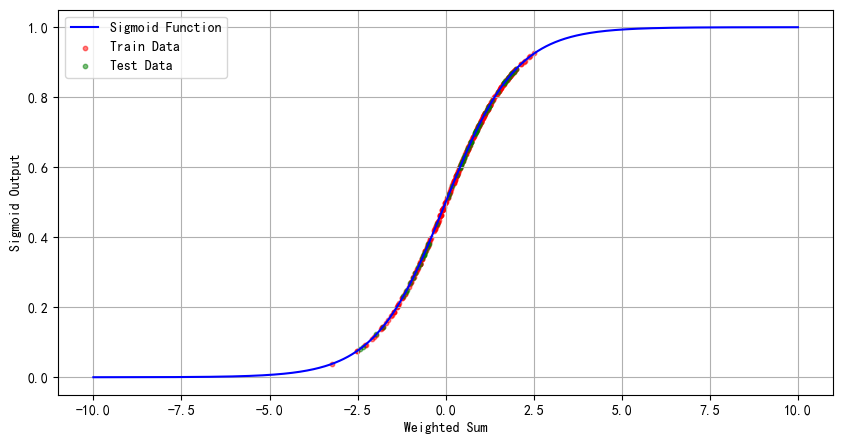

In [31]:
# 计算内积并通过sigmoid函数映射到[0, 1]区间
train_predictions = 1 / (1 + np.exp(-np.dot(train_data, weights)))
test_predictions = 1 / (1 + np.exp(-np.dot(test_data, weights)))

# 画出sigmoid函数的曲线
x = np.linspace(-10, 10, 1000)
sigmoid_curve = 1 / (1 + np.exp(-x))


# 画出训练数据和测试数据在sigmoid函数上的散点图，调整点的大小和透明度
plt.figure(figsize=(10, 5))
plt.plot(x, sigmoid_curve, label='Sigmoid Function', color='blue')
plt.scatter(np.dot(train_data, weights), train_predictions, label='Train Data', color='red', s=10, alpha=0.5)
plt.scatter(np.dot(test_data, weights), test_predictions, label='Test Data', color='green', s=10, alpha=0.5)
plt.xlabel('Weighted Sum')
plt.ylabel('Sigmoid Output')
plt.legend()
plt.grid(True)

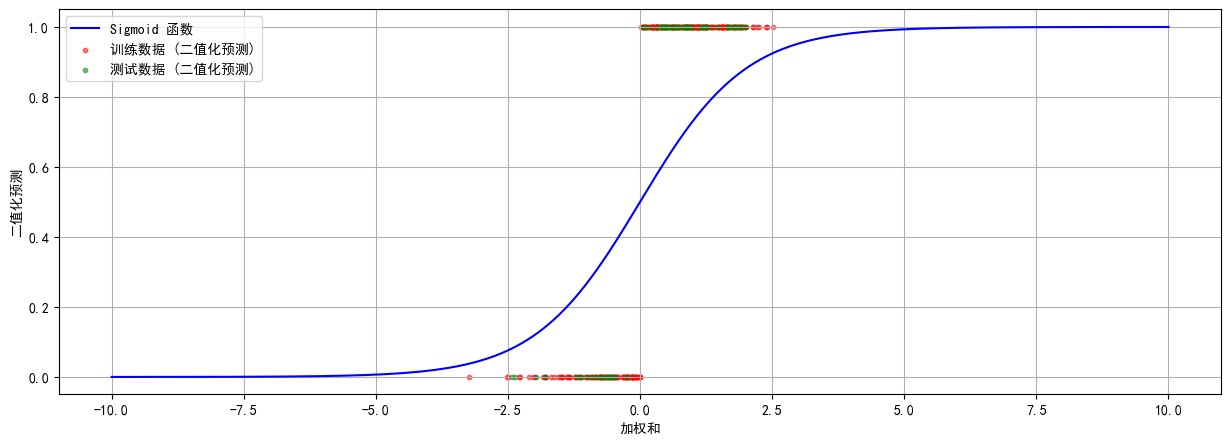

In [32]:
# 在测试集上进行预测
predictions = sigmoid(np.matmul(train_data, weights))
# 将概率值转换为二分类标签（大于等于0.5的为1，小于0.5的为0）
predicted_labels_train = (predictions > 0.5).astype(int)
predicted_labels_test = (sigmoid(np.matmul(test_data, weights)) > 0.5).astype(int)

# 画出二值化后的预测结果
plt.figure(figsize=(15, 5))

# 画出 sigmoid 函数的曲线
plt.plot(x, sigmoid_curve, label='Sigmoid 函数', color='blue')
plt.scatter(np.dot(train_data, weights), predicted_labels_train, label='训练数据 (二值化预测)', color='red', s=10, alpha=0.5)
plt.scatter(np.dot(test_data, weights), predicted_labels_test, label='测试数据 (二值化预测)', color='green', s=10, alpha=0.5)
plt.xlabel('加权和')
plt.ylabel('二值化预测')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
weights1 = np.zeros(train_data.shape[1])
num_iterations = 10000
for _ in range(num_iterations):
    predictions = sigmoid(np.dot(train_data, weights1))
    error = train_label - predictions
    gradient = -np.dot(train_data.T, error)
    hessian = np.dot(train_data.T, np.dot(np.diag(predictions), np.dot(np.diag(1 - predictions), train_data)))
    weights1 -= np.linalg.inv(hessian).dot(gradient)


In [34]:
# 在测试集上进行预测
predictions = sigmoid(np.matmul(test_data, weights1))

# 将概率值转换为二分类标签（大于等于0.5的为1，小于0.5的为0）
predicted_labels = (predictions > 0.5).astype(int)

# 统计总体正确分类的点的个数
correct_total = np.sum(predicted_labels == test_label)

# 计算总体准确率
total_samples = len(test_label)
accuracy_total = correct_total / total_samples

print(f'Total Accuracy: {accuracy_total * 100}%')

# 统计正确分类的0和1的点
correct_label0 = np.sum((predicted_labels == 0) & (test_label == 0))
correct_label1 = np.sum((predicted_labels == 1) & (test_label == 1))
# 统计错误分类的点
misclassified_points = np.where(predicted_labels != test_label)[0]


print(f'Correctly classified Label 0: {correct_label0} points')
print(f'Correctly classified Label 1: {correct_label1} points')
print(f'Misclassified points: {len(misclassified_points)} points')


Total Accuracy: 71.64179104477611%
Correctly classified Label 0: 12 points
Correctly classified Label 1: 36 points
Misclassified points: 19 points


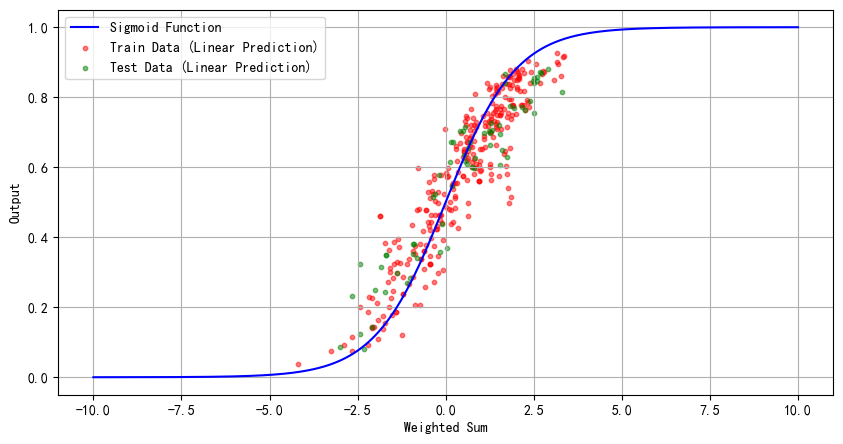

In [35]:
# 画出训练数据和测试数据在权重和上的散点图，调整点的大小和透明度
plt.figure(figsize=(10, 5))
plt.plot(x, sigmoid_curve, label='Sigmoid Function', color='blue')
# 不进行 sigmoid 映射的预测结果
plt.scatter(np.dot(train_data, weights1), train_predictions, label='Train Data (Linear Prediction)', color='red', s=10, alpha=0.5)
plt.scatter(np.dot(test_data, weights1), test_predictions, label='Test Data (Linear Prediction)', color='green', s=10, alpha=0.5)

plt.xlabel('Weighted Sum')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


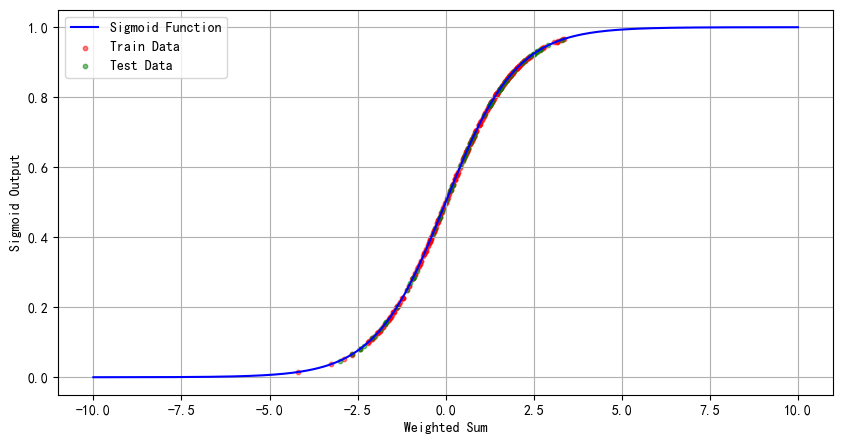

In [36]:
# 计算内积并通过sigmoid函数映射到[0, 1]区间
train_predictions = 1 / (1 + np.exp(-np.dot(train_data, weights1)))
test_predictions = 1 / (1 + np.exp(-np.dot(test_data, weights1)))

# 画出sigmoid函数的曲线
x = np.linspace(-10, 10, 1000)
sigmoid_curve = 1 / (1 + np.exp(-x))


# 画出训练数据和测试数据在sigmoid函数上的散点图，调整点的大小和透明度
plt.figure(figsize=(10, 5))
plt.plot(x, sigmoid_curve, label='Sigmoid Function', color='blue')
plt.scatter(np.dot(train_data, weights1), train_predictions, label='Train Data', color='red', s=10, alpha=0.5)
plt.scatter(np.dot(test_data, weights1), test_predictions, label='Test Data', color='green', s=10, alpha=0.5)
plt.xlabel('Weighted Sum')
plt.ylabel('Sigmoid Output')
plt.legend()
plt.grid(True)
plt.show()

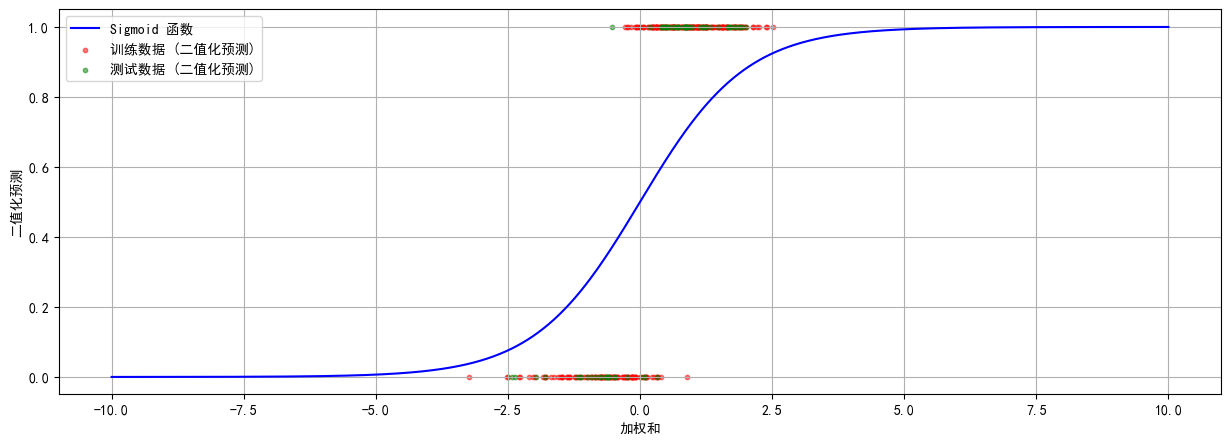

In [37]:
# 在测试集上进行预测
predictions = sigmoid(np.matmul(train_data, weights1))
# 将概率值转换为二分类标签（大于等于0.5的为1，小于0.5的为0）
predicted_labels_train = (predictions > 0.5).astype(int)
predicted_labels_test = (sigmoid(np.matmul(test_data, weights1)) > 0.5).astype(int)

# 画出二值化后的预测结果
plt.figure(figsize=(15, 5))

# 画出 sigmoid 函数的曲线
plt.plot(x, sigmoid_curve, label='Sigmoid 函数', color='blue')
plt.scatter(np.dot(train_data, weights), predicted_labels_train, label='训练数据 (二值化预测)', color='red', s=10, alpha=0.5)
plt.scatter(np.dot(test_data, weights), predicted_labels_test, label='测试数据 (二值化预测)', color='green', s=10, alpha=0.5)
plt.xlabel('加权和')
plt.ylabel('二值化预测')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
#梯度下降线性对比
weights2 = np.zeros(train_data.shape[1])
lr = 0.01
num_iterations = 10000
for _ in range(num_iterations):
    predictions = np.dot(train_data,weights2)
    error = train_label - predictions
    gradient = 2*np.matmul(train_data.T,error)/len(weights2)
    weights2 +=lr*gradient
# 在测试集上进行预测
predictions = sigmoid(np.dot(test_data, weights2))

# 将概率值转换为二分类标签（大于等于0.5的为1，小于0.5的为0）
predicted_labels2 = (predictions >= 0.5).astype(int)

# 计算准确度
accuracy = np.mean(predicted_labels2 == test_label)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 29.850746268656714%


C:\Users\王锴\AppData\Local\Temp\ipykernel_2692\67724855.py:8: RuntimeWarning: overflow encountered in matmul
  gradient = 2*np.matmul(train_data.T,error)/len(weights2)
C:\Users\王锴\AppData\Local\Temp\ipykernel_2692\67724855.py:8: RuntimeWarning: overflow encountered in multiply
  gradient = 2*np.matmul(train_data.T,error)/len(weights2)


In [39]:
#贝叶斯分类器
#先验概率
train_label0 = 0
train_label1=0
for i in range (len(train_label)):
    if (train_label[i] == 0):
        train_label0 =train_label0 + 1
    if(train_label[i] == 1):
        train_label1 =train_label1 +1

# 计算先验概率的对数形式
prior_log_prob_label0 = np.log(train_label0)
prior_log_prob_label1 = np.log(train_label1)

In [40]:
#条件概率
#首先对数据进行归一化
from sklearn.preprocessing import StandardScaler
# 初始化 StandardScaler
scaler = StandardScaler()

# 对特征矩阵进行归一化
_train_data = scaler.fit_transform(train_data)
_test_data = scaler.fit_transform(test_data)

# 将二进制数组转换为二维数组
flattened_one_test_data = _test_data.reshape(_test_data.shape[0], -1)
flattened_zero_test_data = 1 - flattened_one_test_data

# 计算每个测试样本与标签为1和标签为0的概率之和（使用对数概率相加）
prob_sum_one_per_sample = np.dot(flattened_one_test_data, prior_log_prob_label1)
prob_sum_zero_per_sample = np.dot(flattened_zero_test_data, prior_log_prob_label0)
prob_sum_per_sample = prob_sum_one_per_sample + prob_sum_zero_per_sample

# 找到每个样本中相加后最大的标签
predicted_labels = np.argmax(prob_sum_per_sample, axis=1)


In [41]:
from sklearn.metrics import accuracy_score
# 计算预测准确率
accuracy = accuracy_score(test_label, predicted_labels)

print(f"Accuracy: {accuracy}")

Accuracy: 0.014925373134328358


In [42]:
import numpy as np
from sklearn.metrics import accuracy_score

class GaussianNaiveBayes:
    def __init__(self):
        self.class_probs = None
        self.mean = None
        self.variance = None

    def calculate_class_probs(self, labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        total_samples = len(labels)
        self.class_probs = counts / total_samples

    def calculate_mean_variance(self, data, labels):
        num_features = data.shape[1]
        self.mean = np.zeros((2, num_features))
        self.variance = np.zeros((2, num_features))

        for label in [0, 1]:
            subset_data = data[labels == label]
            self.mean[label] = np.mean(subset_data, axis=0)
            self.variance[label] = np.var(subset_data, axis=0)

    def train(self, train_data, train_labels):
        self.calculate_class_probs(train_labels)
        self.calculate_mean_variance(train_data, train_labels)

    def predict(self, test_data):
        num_samples, num_features = test_data.shape
        log_likelihood = np.zeros((num_samples, 2))

        for label in [0, 1]:
            log_likelihood[:, label] = (
                -0.5 * np.sum(np.log(2 * np.pi * self.variance[label]))
                - 0.5 * np.sum(((test_data - self.mean[label]) ** 2) / self.variance[label], axis=1)
                + np.log(self.class_probs[label])
            )

        predicted_labels = np.argmax(log_likelihood, axis=1)
        return predicted_labels

# 读取训练数据
with open('horseColicTraining.txt', 'r') as file:
    content = file.readlines()

train_array = np.array([line.strip().split() for line in content], dtype=float)
train_data = train_array[:, :-1]
train_labels = train_array[:, -1]

# 在矩阵右侧添加一列全为1的列
train_data = np.hstack((train_data, np.ones((train_data.shape[0], 1))))

# 训练高斯朴素贝叶斯模型
gnb = GaussianNaiveBayes()
gnb.train(train_data, train_labels)

# 读取测试数据
with open('horseColicTest.txt', 'r') as file:
    content = file.readlines()

test_array = np.array([line.strip().split() for line in content], dtype=float)
test_data = test_array[:, :-1]
test_labels = test_array[:, -1]

# 在测试数据中添加一列全为1的列
test_data = np.hstack((test_data, np.ones((test_data.shape[0], 1))))

# 使用模型进行预测
predicted_labels = gnb.predict(test_data)

# 计算准确率
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 29.85%


C:\Users\王锴\AppData\Local\Temp\ipykernel_2692\2591396146.py:35: RuntimeWarning: divide by zero encountered in log
  -0.5 * np.sum(np.log(2 * np.pi * self.variance[label]))
C:\Users\王锴\AppData\Local\Temp\ipykernel_2692\2591396146.py:36: RuntimeWarning: invalid value encountered in divide
  - 0.5 * np.sum(((test_data - self.mean[label]) ** 2) / self.variance[label], axis=1)


In [43]:
import pandas as pd

# 读取数据
file_path = "wdbc.data"  # 替换为实际文件路径
column_names = [
    "ID", "Diagnosis", "Radius_Mean", "Texture_Mean", "Perimeter_Mean",
    "Area_Mean", "Smoothness_Mean", "Compactness_Mean", "Concavity_Mean",
    "ConcavePoints_Mean", "Symmetry_Mean", "FractalDimension_Mean",
    "Radius_SE", "Texture_SE", "Perimeter_SE", "Area_SE", "Smoothness_SE",
    "Compactness_SE", "Concavity_SE", "ConcavePoints_SE", "Symmetry_SE",
    "FractalDimension_SE", "Radius_Worst", "Texture_Worst",
    "Perimeter_Worst", "Area_Worst", "Smoothness_Worst",
    "Compactness_Worst", "Concavity_Worst", "ConcavePoints_Worst",
    "Symmetry_Worst", "FractalDimension_Worst"
]

data = pd.read_csv(file_path, names=column_names)
# 显示数据的前几行
print(data.head())

         ID Diagnosis  Radius_Mean  Texture_Mean  Perimeter_Mean  Area_Mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness_Mean  Compactness_Mean  Concavity_Mean  ConcavePoints_Mean  ...  \
0          0.11840           0.27760          0.3001             0.14710  ...   
1          0.08474           0.07864          0.0869             0.07017  ...   
2          0.10960           0.15990          0.1974             0.12790  ...   
3          0.14250           0.28390          0.2414             0.10520  ...   
4          0.10030           0.13280          0.1980             0.10430  ...   

   Radius_Worst  Texture_Worst  Perime

In [44]:
from sklearn.model_selection import train_test_split

# 假设 'Diagnosis' 列是标签列，其余列是特征列
features = data.drop(columns=['ID', 'Diagnosis'])
labels = data['Diagnosis']

# 划分数据集，80% 用于训练，20% 用于测试
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

In [45]:
# 定义 sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 计算准确率的函数
def calculate_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_samples = len(true_labels)
    accuracy = correct_predictions / total_samples
    return accuracy

# 初始化权重为零
weights = np.zeros(train_data.shape[1])

# 学习率和迭代次数
rate = 0.01  # 学习率
num_iterations = 100000  # 迭代次数

# 梯度下降训练
for i in range(num_iterations):
    # 计算预测值
    predictions = sigmoid(np.matmul(train_data, weights))

    # 计算梯度
    gradient = np.matmul(train_data.T, (predictions - train_label)) / total

    # 更新权重
    weights -= rate * gradient

# 在测试集上进行预测
predictions = sigmoid(np.matmul(test_data, weights))

# 将概率值转换为二分类标签（大于等于0.5的为1，小于0.5的为0）
predicted_labels = (predictions > 0.5).astype(int)

# 计算准确率
accuracy = calculate_accuracy(predicted_labels, test_label)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 77.61194029850746%
